In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.options.display.max_columns = 0

In [5]:
df = pd.read_csv('application_train.csv')

In [20]:
print(df.shape)
df.head()

(307511, 122)


,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [17]:
df.rename(columns=str.lower, inplace=True)

In [18]:
df.name_contract_type.value_counts()

Cash loans         278232
Revolving loans     29279
Name: name_contract_type, dtype: int64

In [19]:
df.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [21]:
df.flag_own_car.value_counts()

N    202924
Y    104587
Name: flag_own_car, dtype: int64

In [22]:
df.flag_own_realty.value_counts()

Y    213312
N     94199
Name: flag_own_realty, dtype: int64

In [23]:
df.cnt_children.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: cnt_children, dtype: int64

In [25]:
df.amt_income_total.plot.hist()

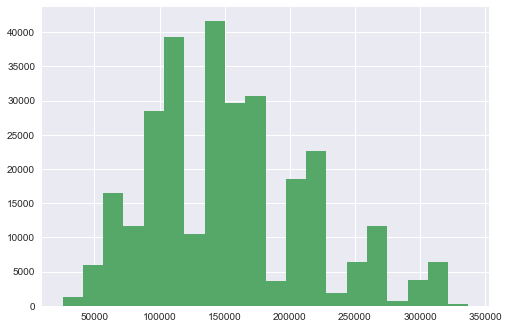

In [32]:
tf = df.amt_income_total
tf[tf<tf.quantile(0.95)].hist(bins=20)
plt.show()

In [33]:
df.amt_annuity.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: amt_annuity, dtype: float64

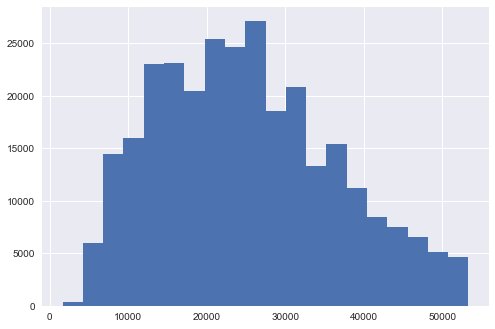

In [34]:
tf = df.amt_annuity
tf[tf<tf.quantile(0.95)].hist(bins=20)
plt.show()

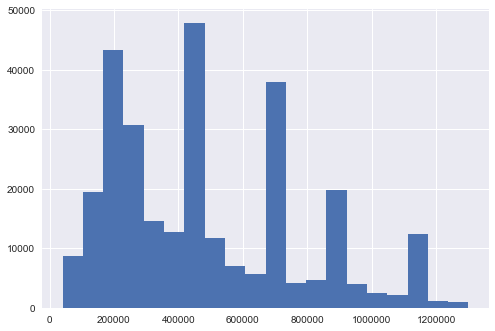

In [35]:
tf = df.amt_goods_price
tf[tf<tf.quantile(0.95)].hist(bins=20)
plt.show()

In [39]:
df.name_type_suite.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64

In [40]:
df.name_income_type.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64

In [41]:
df.name_education_type.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: name_education_type, dtype: int64

In [42]:
df.name_family_status.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64

In [43]:
df.name_housing_type.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: name_housing_type, dtype: int64

In [44]:
df.region_population_relative.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: region_population_relative, dtype: float64

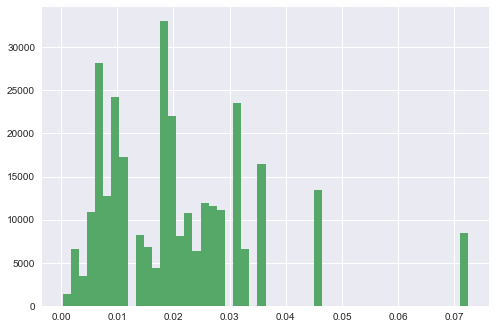

In [46]:
df.region_population_relative.hist(bins=50)
plt.show()

In [51]:
((-df.days_birth)/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: days_birth, dtype: float64

In [57]:
tf = df.days_employed 
tf[tf>100000]

8         365243
11        365243
23        365243
38        365243
43        365243
46        365243
54        365243
56        365243
62        365243
79        365243
81        365243
84        365243
99        365243
105       365243
106       365243
108       365243
117       365243
118       365243
125       365243
140       365243
143       365243
156       365243
157       365243
158       365243
173       365243
174       365243
175       365243
185       365243
213       365243
220       365243
           ...  
307369    365243
307370    365243
307386    365243
307390    365243
307392    365243
307393    365243
307398    365243
307401    365243
307402    365243
307404    365243
307405    365243
307406    365243
307417    365243
307420    365243
307422    365243
307424    365243
307426    365243
307430    365243
307433    365243
307434    365243
307441    365243
307443    365243
307445    365243
307450    365243
307463    365243
307469    365243
307483    365243
307487    3652

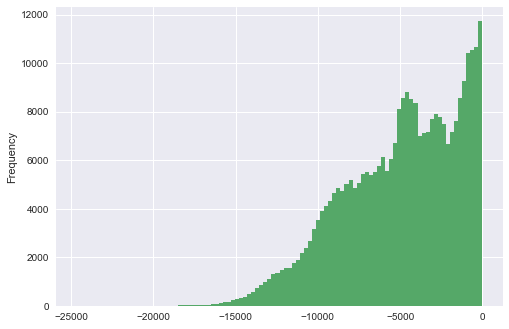

In [59]:
df.days_registration.plot.hist(bins=100)
plt.show()

In [60]:
df.days_registration.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: days_registration, dtype: float64

In [61]:
df.days_id_publish.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: days_id_publish, dtype: float64

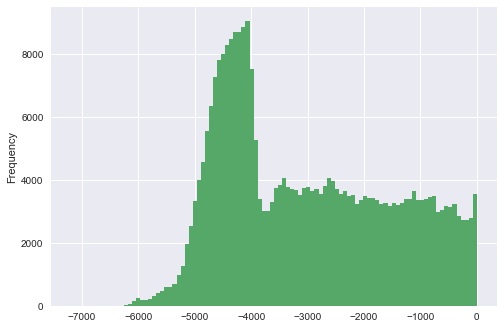

In [63]:
df.days_id_publish.plot.hist(bins=100)
plt.show()

In [64]:
df.own_car_age.describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: own_car_age, dtype: float64

In [66]:
tf = df.own_car_age
tf[tf>tf.quantile(0.98)].describe()

count    894.000000
mean      65.062640
std        1.236118
min       65.000000
25%       65.000000
50%       65.000000
75%       65.000000
max       91.000000
Name: own_car_age, dtype: float64

In [67]:
df.flag_mobil.value_counts()

1    307510
0         1
Name: flag_mobil, dtype: int64

In [68]:
df.flag_emp_phone.value_counts()

1    252125
0     55386
Name: flag_emp_phone, dtype: int64

In [69]:
df.flag_cont_mobile.value_counts()

1    306937
0       574
Name: flag_cont_mobile, dtype: int64

In [70]:
df.flag_work_phone.value_counts()

0    246203
1     61308
Name: flag_work_phone, dtype: int64

In [71]:
df.flag_email.value_counts()

0    290069
1     17442
Name: flag_email, dtype: int64

In [72]:
df.occupation_type.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

In [73]:
df.cnt_fam_members.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: cnt_fam_members, dtype: int64

In [75]:
df.cnt_children.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: cnt_children, dtype: int64

In [76]:
df.region_rating_client.value_counts()

2    226984
3     48330
1     32197
Name: region_rating_client, dtype: int64

In [77]:
df.region_rating_client_w_city.value_counts()

2    229484
3     43860
1     34167
Name: region_rating_client_w_city, dtype: int64

In [78]:
df.weekday_appr_process_start.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: weekday_appr_process_start, dtype: int64

In [80]:
df.hour_appr_process_start.describe()

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: hour_appr_process_start, dtype: float64

In [81]:
df.reg_region_not_live_region.value_counts()

0    302854
1      4657
Name: reg_region_not_live_region, dtype: int64

In [82]:
df.reg_region_not_work_region.value_counts()

0    291899
1     15612
Name: reg_region_not_work_region, dtype: int64

In [83]:
df.live_region_not_work_region.value_counts()

0    295008
1     12503
Name: live_region_not_work_region, dtype: int64

In [84]:
df.reg_city_not_live_city.value_counts()

0    283472
1     24039
Name: reg_city_not_live_city, dtype: int64

In [85]:
df.reg_city_not_work_city.value_counts()

0    236644
1     70867
Name: reg_city_not_work_city, dtype: int64

In [86]:
df.organization_type.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

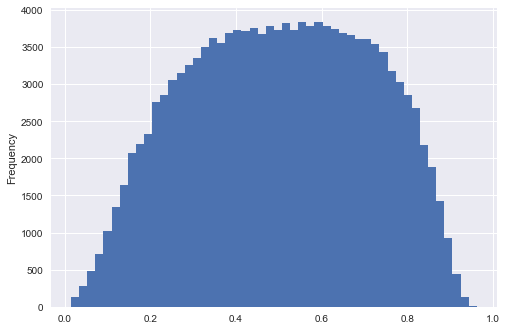

In [87]:
df.ext_source_1.plot.hist(bins=50)
plt.show()

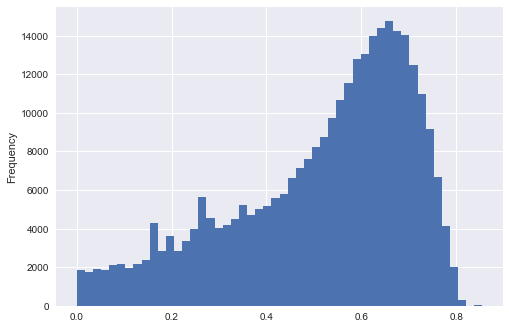

In [88]:
df.ext_source_2.plot.hist(bins=50)
plt.show()

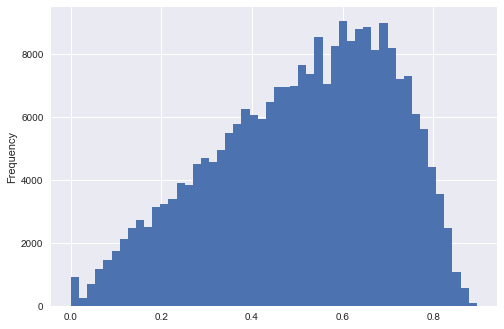

In [89]:
df.ext_source_3.plot.hist(bins=50)
plt.show()

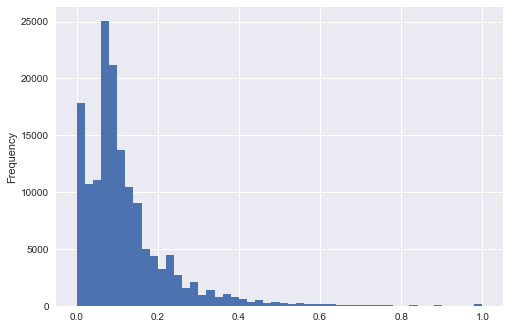

In [90]:
df.apartments_avg.plot.hist(bins=50)
plt.show()

In [91]:
df.elevators_mode.describe()

count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: elevators_mode, dtype: float64

In [97]:
df.housetype_mode.unique()

array(['block of flats', nan, 'terraced house', 'specific housing'], dtype=object)

In [98]:
df.obs_30_cnt_social_circle.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: obs_30_cnt_social_circle, dtype: float64

In [99]:
df.def_30_cnt_social_circle.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: def_30_cnt_social_circle, dtype: int64

In [100]:
df.days_last_phone_change.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: days_last_phone_change, dtype: float64

In [101]:
df.flag_document_10.value_counts()

0    307504
1         7
Name: flag_document_10, dtype: int64

In [102]:
df.amt_req_credit_bureau_day.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: amt_req_credit_bureau_day, dtype: float64

In [ ]:
# EDA on occupation/org

def aggfunc(g):
    group_perc = g.target.sum()/g.target.count()
    group_cnt = g.target.count()
    
    tf = g.groupby('occupation_type')['target'].agg(['sum','count'])
    tf['occu_perc'] = tf['sum']/tf['count']
    tfs = tf.sort_values(by=['occu_perc'])
    tfs['group_perc'] = group_perc
    tfs['group_cnt'] = group_cnt
    
    result = tfs[-5:]
    
    return result

df_occu = df.groupby('organization_type').apply(aggfunc)

df_occu.sort_values(by=['group_perc', 'occu_perc'],ascending=False)

# Bureau data exploration

In [2]:
bf = pd.read_csv('input/bureau.csv')

In [4]:
# convert feature names to lower cases
bf.rename(columns=str.lower, inplace=True)

In [15]:
bf.head(10)

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [41]:
def aggfunc(g):
    # try num of instances when applicant had overdue
    num_overdue = (g['credit_day_overdue'] > 0).sum()
       
    return pd.DataFrame([[num_credit, num_overdue]], columns=['num_credit', 'num_overdue'])

In [44]:
bf.head(10).groupby('sk_id_curr').apply(aggfunc)

,,num_credit,num_overdue
sk_id_curr,,,
162297,0,1,0
215354,0,6,0


In [46]:
bf['credit_currency'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: credit_currency, dtype: int64

In [47]:
bf[bf.credit_day_overdue > 0]['credit_day_overdue'].describe()

count    4217.000000
mean      333.014940
std       658.070636
min         1.000000
25%        17.000000
50%        34.000000
75%       150.000000
max      2792.000000
Name: credit_day_overdue, dtype: float64